#### Nama : Angello Khara Sitanggang
#### NPM  : 220711833
#### Nama : Davin Gilbert Natanael
#### NPM  : 220711841
#### Kelompok SB : Transformer
#### Arsitektur : AlexNet


In [22]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

data_dir = r"train_data"
img_size = 227
batch = 16
validation_split = 0.1


dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch
)

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
    validation_split=validation_split,
    subset="training"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
    validation_split=validation_split,
    subset="validation"
)

class_names = train_ds.class_names


train_images = sum(1 for _ in train_ds)
val_images = sum(1 for _ in val_ds)


print(f"Train Images: {train_images}")
print(f"Validation Images: {val_images}")
print("Class names:", class_names)



Found 1080 files belonging to 3 classes.
Found 1080 files belonging to 3 classes.
Using 972 files for training.
Found 1080 files belonging to 3 classes.
Using 108 files for validation.
Train Images: 61
Validation Images: 7
Class names: ['Busuk', 'Matang', 'Mentah']


In [24]:
import os

def count_images_in_class(data_dir):
    class_counts = {}
    
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        
        if os.path.isdir(class_dir):
            # Count the number of image files in each directory
            image_count = sum(1 for file in os.listdir(class_dir) if file.lower().endswith(('jpg', 'jpeg', 'png', 'gif', 'bmp')))
            class_counts[class_name] = image_count
    
    return class_counts

# Count the images in each class directory
image_counts = count_images_in_class("train_data")
print(image_counts)


{'Busuk': 360, 'Matang': 360, 'Mentah': 360}


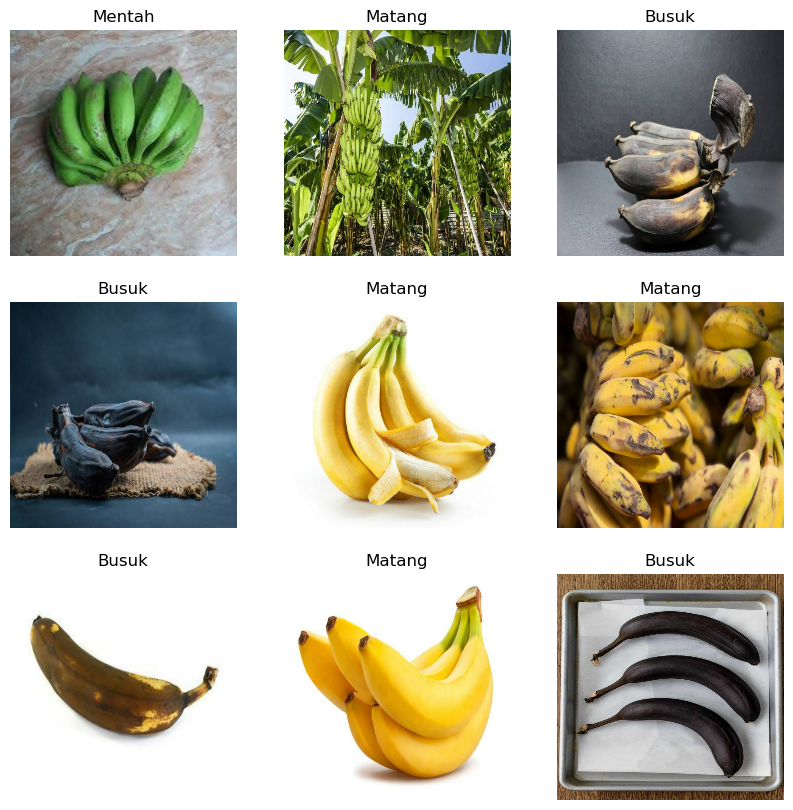

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

i = 0
for images, labels in train_ds.take(9):  # Take 9 batches, but each batch has only 1 image
    plt.subplot(3, 3, i+1)
    plt.imshow(images[0].numpy().astype('uint8'))  # Access the first (and only) image in the batch
    plt.title(class_names[labels[0].numpy()])  # Access the label directly (not using argmax)
    plt.axis('off')
    i += 1

plt.show()


In [25]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)
    

(16, 227, 227, 3)


In [26]:
import os
from PIL import Image


train_dir = "train_data" 

def check_invalid_images(directory):
    invalid_images = []
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify() 
            except (IOError, SyntaxError):
                print(f"Gambar tidak valid: {file_path}")
                invalid_images.append(file_path)
    return invalid_images

invalid_images = check_invalid_images(train_dir)

if invalid_images:
    print("\nDaftar gambar tidak valid:")
    for img in invalid_images:
        print(img)
else:
    print("Semua gambar valid!")


Semua gambar valid!


In [27]:
import os
from PIL import Image

valid_formats = ['JPEG', 'PNG', 'GIF', 'BMP']

def check_invalid_images(directory):
    invalid_images = []
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    if img.format not in valid_formats:
                        print(f"Gambar tidak valid (format tidak didukung): {file_path}")
                        invalid_images.append(file_path)
            except (IOError, SyntaxError) as e:
                print(f"Gambar tidak valid: {file_path} - Error: {e}")
                invalid_images.append(file_path)
    return invalid_images

invalid_images = check_invalid_images("train_data")

if invalid_images:
    print("\nDaftar gambar tidak valid:")
    for img in invalid_images:
        print(img)
else:
    print("Semua gambar valid!")


Semua gambar valid!


In [28]:
from PIL import Image
import os

data_dir = "D:\\Documents\\SEMESTER 5\\PMPM\\Project UAS\\train_data"

for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            with Image.open(file_path) as img:
                img.verify()  # Verifikasi format gambar
                if img.format not in ["JPEG", "PNG", "GIF", "BMP"]:
                    print(f"Format tidak didukung: {file_path} - {img.format}")
        except Exception as e:
            print(f"Error: {file_path} - {e}")


In [ ]:
# import os
# from PIL import Image

# def validate_and_remove_images(directory):
#     for root, _, files in os.walk(directory):
#         for file in files:
#             file_path = os.path.join(root, file)
#             try:
#                 with Image.open(file_path) as img:
#                     img.verify()  # Verify that the image can be opened
#             except Exception as e:
#                 print(f"Invalid image found and removed: {file_path}")
#                 os.remove(file_path)  # Remove the problematic file

# # Run the function on your dataset directory
# validate_and_remove_images(r"D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data")


Invalid image found and removed: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (205).jpg
Invalid image found and removed: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (208).jpg
Invalid image found and removed: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (209).jpg
Invalid image found and removed: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (210).jpg
Invalid image found and removed: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (211).jpg
Invalid image found and removed: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (212).jpg
Invalid image found and removed: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (213).jpg
Invalid image found and removed: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (246).jpg
Invalid image found and removed: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (248).jpg
Invalid image found and removed: D:\D

In [5]:
# from PIL import Image
# import os

# # List of dataset folders to process
# dataset_folders = [
#     r"D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data",
#     r"D:\Documents\SEMESTER 5\PMPM\Project UAS\test_data",
#     r"D:\Documents\SEMESTER 5\PMPM\Project UAS\prediksi"
# ]

# # Loop through each folder
# for folder in dataset_folders:
#     print(f"Processing folder: {folder}")
#     for root, dirs, files in os.walk(folder):
#         for file in files:
#             file_path = os.path.join(root, file)
#             try:
#                 # Try opening the image
#                 with Image.open(file_path) as img:
#                     # Convert and save as JPEG
#                     new_file_path = os.path.splitext(file_path)[0] + ".jpg"
#                     img.convert("RGB").save(new_file_path, "JPEG")
#                     print(f"Converted: {file_path} -> {new_file_path}")
#             except Exception as e:
#                 print(f"Failed to process {file_path}: {e}")


Processing folder: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data
Converted: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (100).jpg -> D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (100).jpg
Converted: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (101).jpg -> D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (101).jpg
Converted: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (102).jpg -> D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (102).jpg
Converted: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (103).jpg -> D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (103).jpg
Converted: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (104).jpg -> D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (104).jpg
Converted: D:\Documents\SEMESTER 5\PMPM\Project UAS\train_data\Busuk\Busuk (105).jpg -> D:\Documents\SEMESTER 5\PMPM\Pr

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train Images: 972
Validation Images: 108


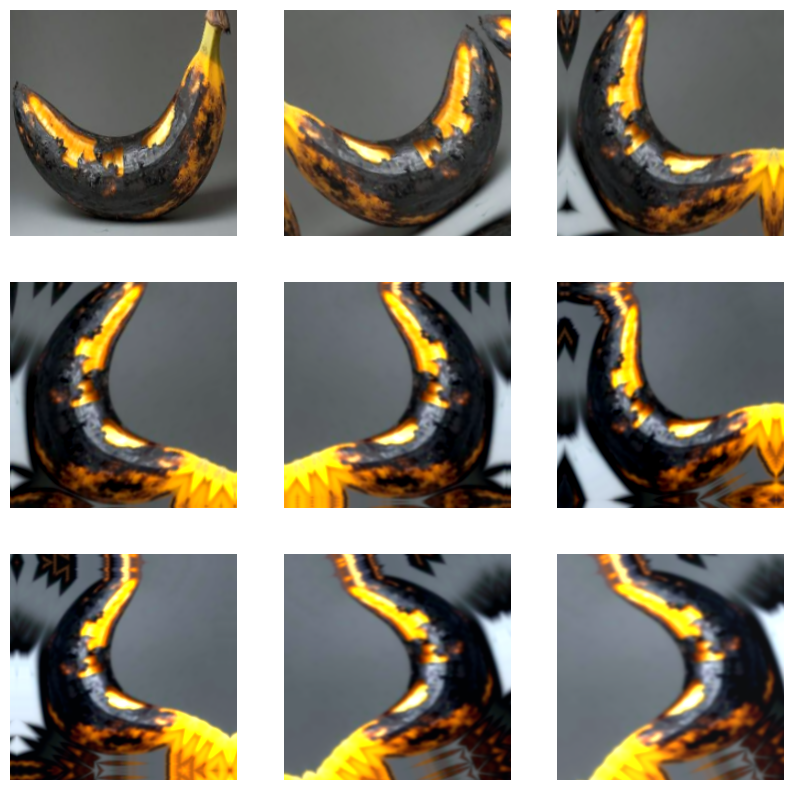

In [60]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=Tuner)
val_ds = val_ds.cache().prefetch(buffer_size=Tuner)

data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(height_factor=0.1, width_factor=0.1),
    layers.RandomBrightness(factor=0.1),
    layers.RandomContrast(factor=0.2),
    layers.GaussianNoise(0.03),
])



train_count = sum(len(images) for images, _ in train_ds)
val_count = sum(len(images) for images, _ in val_ds)

print(f"Train Images: {train_count}")
print(f"Validation Images: {val_count}")

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(69):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')


In [61]:
import tensorflow as tf
import keras
from keras._tf_keras.keras.backend import clear_session
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Input, Dense, Conv2D, Flatten, MaxPool2D, Dropout


def alexnet(input_shape, n_classes):
    input = Input(input_shape)


    x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
    x = MaxPool2D(3, strides=2)(x)
    

    x = Conv2D(256, 5, padding='same', activation='relu')(x)
    x = MaxPool2D(3, strides=2)(x)
    

    x = Conv2D(384, 3, padding='same', activation='relu')(x)
    

    x = Conv2D(384, 3, padding='same', activation='relu')(x)
    

    x = Conv2D(256, 3, padding='same', activation='relu')(x)
    x = MaxPool2D(3, strides=2)(x)
    

    x = Flatten()(x)
    

    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    output = Dense(n_classes, activation='softmax')(x)
    
    model = Model(input, output)
    return model


input_shape = (227, 227, 3)  
n_classes = 3 

clear_session()

model = alexnet(input_shape, n_classes)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 227, 227, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 57, 57, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,730,499 (33.30 MB)

 Trainable params: 8,730,499 (33.30 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=10,
    min_lr=0.00001,
    cooldown=2
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    mode='max',
    restore_best_weights=True,
    min_delta=0.001
)


y_train = []
for images, labels in train_ds:
    y_train.extend(labels.numpy())

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))


history = model.fit(
    train_ds,
    epochs=60,
    validation_data=val_ds,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict
)

Epoch 1/60
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 289ms/step - accuracy: 0.3986 - loss: 6.1259 - val_accuracy: 0.8519 - val_loss: 0.3750 - learning_rate: 1.0000e-04
Epoch 2/60
61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.8410 - loss: 0.4786 - val_accuracy: 0.9167 - val_loss: 0.2596 - learning_rate: 1.0000e-04
Epoch 3/60
61/61 ━━━━━━━━━━━━━━━━━━━━ 17s 284ms/step - accuracy: 0.9184 - loss: 0.3226 - val_accuracy: 0.9352 - val_loss: 0.1724 - learning_rate: 1.0000e-04
Epoch 4/60
61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step - accuracy: 0.9148 - loss: 0.2527 - val_accuracy: 0.9352 - val_loss: 0.1703 - learning_rate: 1.0000e-04
Epoch 5/60
61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step - accuracy: 0.9371 - loss: 0.2142 - val_accuracy: 0.9722 - val_loss: 0.1124 - learning_rate: 1.0000e-04
Epoch 6/60
61/61 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.9464 - loss: 0.2045 - val_accuracy: 0.9537 - val_loss: 0.1146 - learning_rate: 1.0000e-04
Epoch 7/60
61/61 ━━━━━━━━━━━━━━━━━━━━ 16s 265ms/step - acc

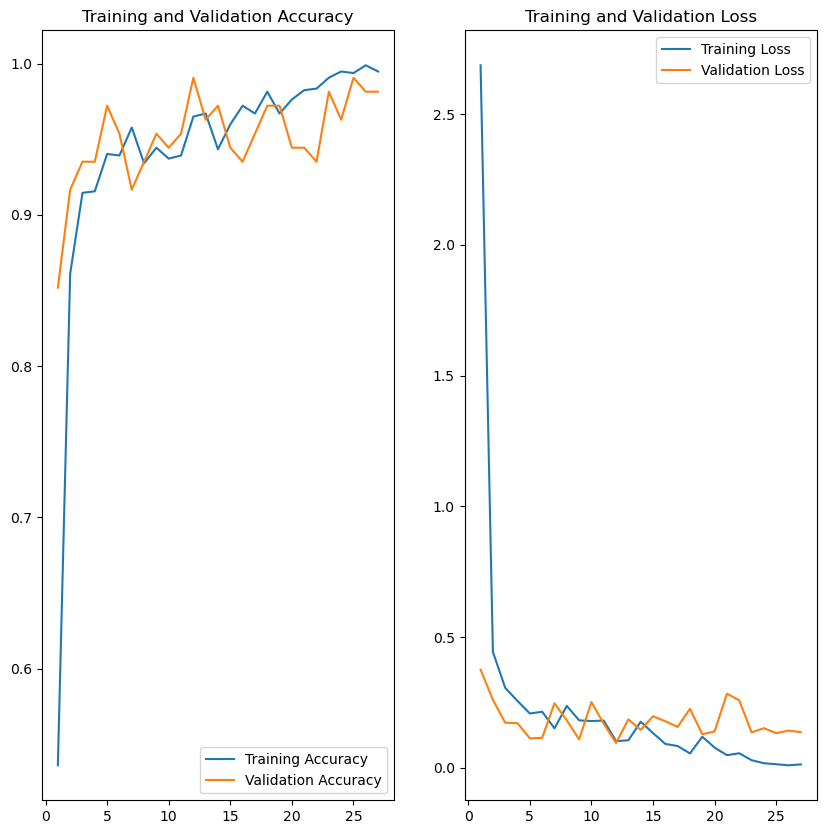

In [64]:

ephocs_range = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [65]:
model.save('AlexNet.h5')

In [68]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image


model = load_model(r'AlexNet.h5')  
class_names = ['Busuk', 'Matang', 'Mentah']

def classify_images(image_path, save_path='predicted_image.jpg'):
    try:

        input_image = tf.keras.utils.load_img(image_path, target_size=(227, 227))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Add batch dimension


        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"
result = classify_images(r'test_data\Mentah\Mentah (118).jpg', save_path='MENTAH.jpg')
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Prediksi: Mentah
Confidence: 57.61%
Prediksi: Mentah dengan confidence 57.61%. Gambar asli disimpan di MENTAH.jpg.


Found 30 files belonging to 3 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


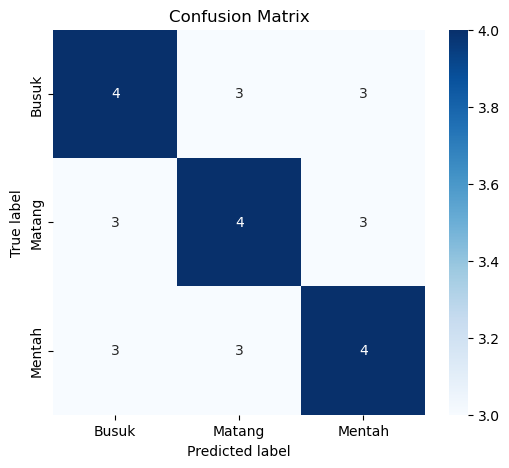

Prediksi
Confusion Matrix:
 [[4 3 3]
 [3 4 3]
 [3 3 4]]
Accuracy: 0.4
Precision: [0.4 0.4 0.4]
Recall: [0.4 0.4 0.4]
F1 Score: [0.4 0.4 0.4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
              precision    recall  f1-score   support

       Busuk       0.10      0.10      0.10        10
      Matang       0.20      0.20      0.20        10
      Mentah       0.20      0.20      0.20        10

    accuracy                           0.17        30
   macro avg       0.17      0.17      0.17        30
weighted avg       0.17      0.17      0.17        30



In [74]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt


test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'Prediksi',
    labels='inferred',
    label_mode='categorical',  
    batch_size=32,
    image_size=(227, 227)
)


y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1) 


true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy()) 
true_labels = tf.convert_to_tensor(true_labels)


conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Busuk', 'Matang', 'Mentah'], yticklabels=['Busuk', 'Matang', 'Mentah'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan hasil
###Terdapat code yang hilang disini! lihat modul untuk menemukanya
print('Prediksi')
print("Confusion Matrix:\n", conf_mat.numpy())
print("Accuracy:", accuracy.numpy())
print("Precision:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())

from sklearn.metrics import classification_report

y_true = [np.argmax(labels.numpy(), axis=1) for _, labels in test_data]
y_true = np.concatenate(y_true)  # Flatten the list of arrays into a single array
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=class_names))

Found 120 files belonging to 3 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


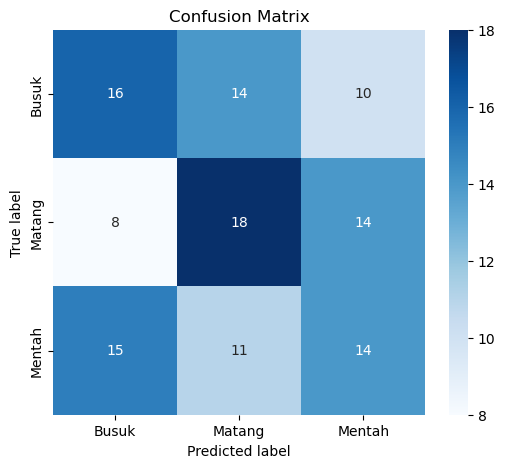

Test Data
Confusion Matrix:
 [[16 14 10]
 [ 8 18 14]
 [15 11 14]]
Accuracy: 0.4
Precision: [0.41025641 0.41860465 0.36842105]
Recall: [0.4  0.45 0.35]
F1 Score: [0.40506329 0.43373494 0.35897436]
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
              precision    recall  f1-score   support

       Busuk       0.15      0.15      0.15        40
      Matang       0.28      0.30      0.29        40
      Mentah       0.26      0.25      0.26        40

    accuracy                           0.23       120
   macro avg       0.23      0.23      0.23       120
weighted avg       0.23      0.23      0.23       120



In [99]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt


test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data',
    labels='inferred',
    label_mode='categorical',  
    batch_size=16,
    image_size=(227, 227)
)


y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1) 


true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy()) 
true_labels = tf.convert_to_tensor(true_labels)


conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Busuk', 'Matang', 'Mentah'], yticklabels=['Busuk', 'Matang', 'Mentah'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print('Test Data')
print("Confusion Matrix:\n", conf_mat.numpy())
print("Accuracy:", accuracy.numpy())
print("Precision:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())

from sklearn.metrics import classification_report

y_true = [np.argmax(labels.numpy(), axis=1) for _, labels in test_data]
y_true = np.concatenate(y_true)  # Flatten the list of arrays into a single array
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=class_names))